<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [1]:
# Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Visualizing Charts.
plt.rcParams['figure.figsize']=[15,6]

from IPython.display import display, HTML                                             ## Increasing width of notebook.
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split as tts

#### Load the customer tip dataset and print the first five observations

In [3]:
tip=pd.read_csv('customer_tip.csv')

In [4]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. What is the percentage of males and females in the dataset? and display it in the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

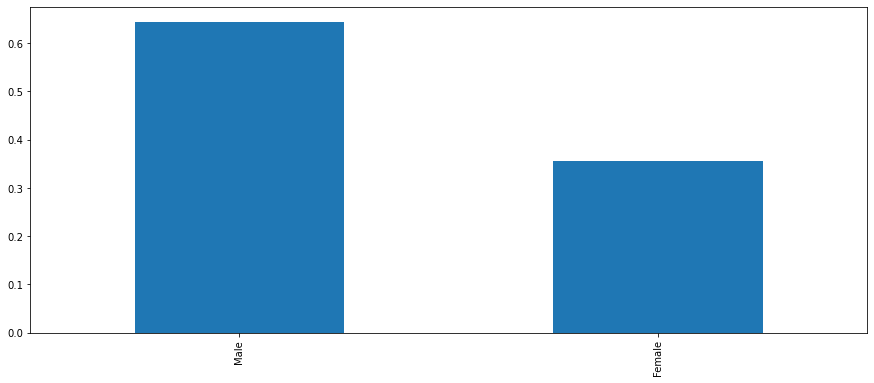

In [5]:
tip.sex.value_counts(normalize=True).plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any relationship between tip and total bill amount? Support your answer with a plot
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

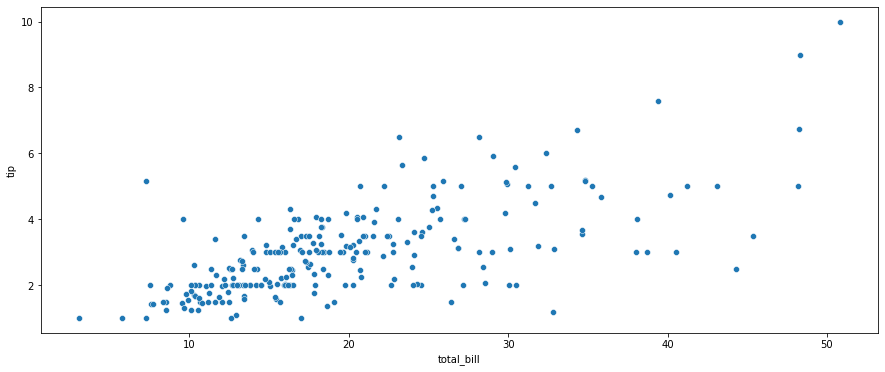

In [8]:
sns.scatterplot('total_bill','tip',data=tip)
plt.show()

#increases with increase in bill amount

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Which is the busiest day and time at the restaurant?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
pd.crosstab(tip['day'],tip['time'])

# Saturday is the busiest day

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Compute the gender-wise count based on smoking habits</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
tip.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Compare the tip amount given for different days 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
tip.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is the average bill amount dependent on the size of the group?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

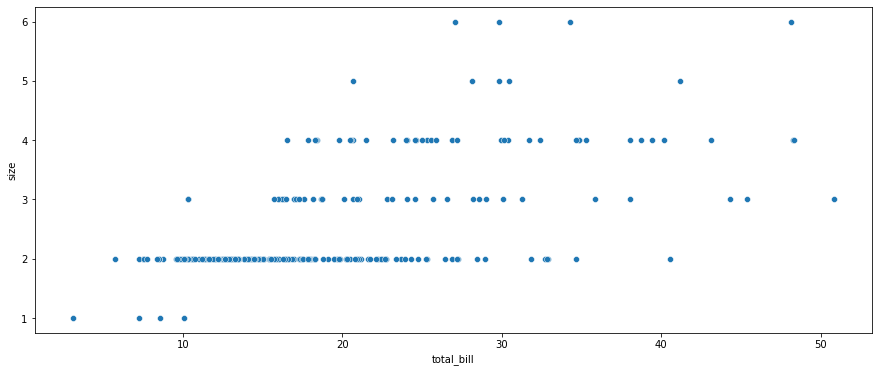

In [12]:
sns.scatterplot(tip['total_bill'],tip['size'])
tip.groupby('size')['total_bill'].mean()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is the tip amount varying based on gender and time?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
tip.groupby(['sex','time'])['tip'].mean()

sex     time  
Female  Dinner    3.002115
        Lunch     2.582857
Male    Dinner    3.144839
        Lunch     2.882121
Name: tip, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Visualize the average bill amount for each day</b>
                </font>
            </div>
        </td>
    </tr>
</table>

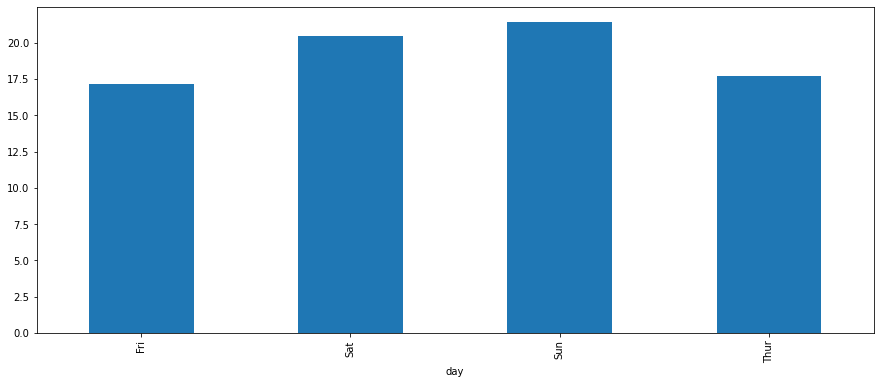

In [15]:
tip.groupby('day')['total_bill'].mean().plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Plot a horizontal boxplot to compare the bill amount based on gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

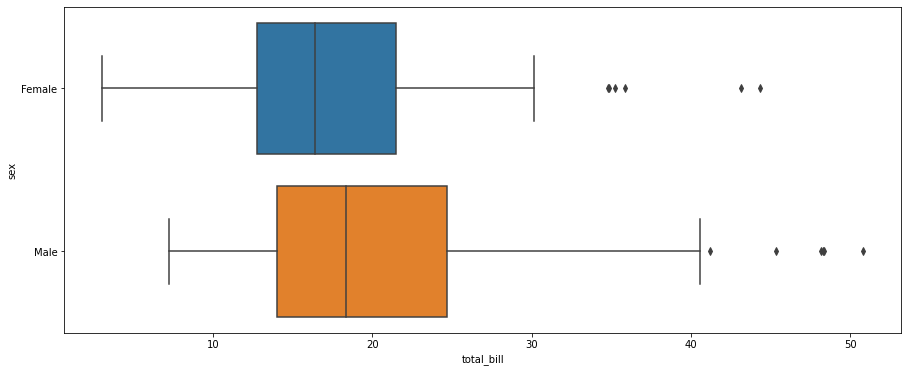

In [16]:
sns.boxplot(tip['total_bill'],tip['sex'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the maximum bill amount for lunch and dinner on Saturday and Sunday </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
tipp = tip.loc[(tip['day']=='Sat')|(tip['day']=='Sun'),:]
tipp
new = tipp.groupby(['day','time'])['total_bill'].max()
new

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64